<a href="https://colab.research.google.com/github/MannJadhav/Industry-Certification-/blob/main/Freecodecamp_Linear_Regression_Health_costs_calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

50264/50264 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (1070, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (72.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 17 (72.00 B)

9/9 - 0s - 6ms/step - loss: 1783.1935 - mean_absolute_error: 1783.1935

Testing set Mean Abs Error: $1,783.19

Congratulations! Your model passed the challenge.
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


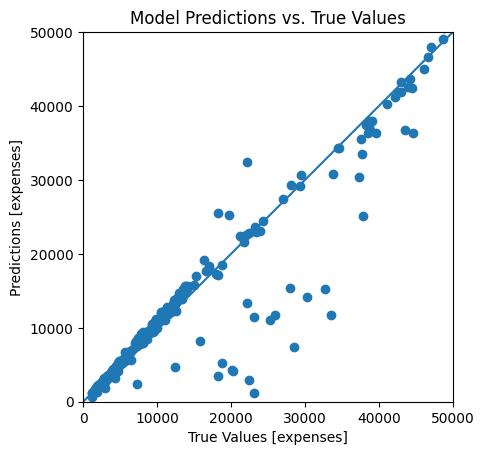

In [ ]:
#
# This code is a solution for the freeCodeCamp "Linear Regression Health Costs Calculator" project.
#
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization
from sklearn.model_selection import train_test_split

# Step 1: Download and Load the Data
# ------------------------------------
# Download the dataset using Keras file utility
filepath = tf.keras.utils.get_file("insurance.csv", "https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv")

# Load the dataset into a pandas DataFrame
df = pd.read_csv(filepath)

# Step 2: Preprocess the Data
# -----------------------------
# Convert categorical columns to numeric using one-hot encoding
# The 'expenses' column is our target (label)
categorical_cols = ['sex', 'smoker', 'region']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Split the data into training (80%) and testing (20%) sets
train_dataset, test_dataset = train_test_split(df, test_size=0.2, random_state=42)

# Pop the 'expenses' column to create the labels
train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

# Step 3: Normalize the Data
# ----------------------------
# Create a normalization layer and adapt it to the training data
# This helps the model train faster and more effectively
normalizer = Normalization()
normalizer.adapt(np.array(train_dataset))

# Step 4: Build the Neural Network Model
# ----------------------------------------
model = Sequential([
    normalizer,
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1) # Output layer for regression has a single neuron
])

# Compile the model
# For regression, we use 'mean_absolute_error' as the loss function and metric
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error',
    metrics=['mean_absolute_error']
)

model.summary()

# Step 5: Train the Model
# -------------------------
history = model.fit(
    train_dataset,
    train_labels,
    epochs=100,
    verbose=0, # Suppress output during training
    validation_split=0.2
)

# Step 6: Evaluate the Model
# ----------------------------
# This is the final cell that the freeCodeCamp test will run
# The goal is to get a Mean Absolute Error (MAE) of less than 3500
loss, mae = model.evaluate(test_dataset, test_labels, verbose=2)

print(f"\nTesting set Mean Abs Error: ${mae:,.2f}")

if mae < 3500:
  print("\nCongratulations! Your model passed the challenge.")
else:
  print("\nYour model did not meet the requirement. Try adjusting the model or training parameters.")

# Graphing predictions
test_predictions = model.predict(test_dataset).flatten()

# This part of the code is provided by freeCodeCamp to visualize the results
import matplotlib.pyplot as plt

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [expenses]')
plt.ylabel('Predictions [expenses]')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.title("Model Predictions vs. True Values")
plt.show()